<a href="https://colab.research.google.com/github/simulate111/Supervised-Machine-Learning/blob/main/quiz20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 2 - Programming Excercises

## 1. Generalisation Error Bound

The code below creates a 2D binary classification dataset composed of two interleaving, moon-shaped half circles. (These data points are not really linearly separable.)

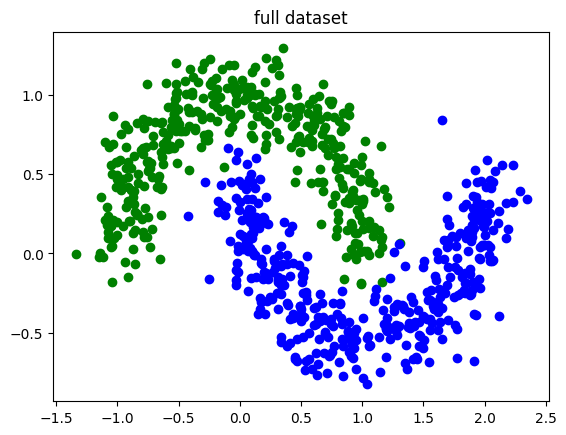

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# number of total samples
n_tot = 800
# number of training samples
n_tr = int(n_tot/2)

X, y = make_moons(n_tot, noise=0.15, random_state=0)

# divide data into training and testing
np.random.seed(42)
order = np.random.permutation(n_tot)
train = order[:n_tr]
test = order[n_tr:]

Xtr = X[train, :]
ytr = y[train]
Xtst = X[test, :]
ytst = y[test]

# Save the data
np.save("data/Xtr.npy", Xtr)
np.save("data/Xtst.npy", Xtst)
np.save("data/ytr.npy", ytr)
np.save("data/ytst.npy", ytst)

# load the data
Xtr = np.load("data/Xtr.npy")
Xtst = np.load("data/Xtst.npy")
ytr = np.load("data/ytr.npy")
ytst = np.load("data/ytst.npy")
n = len(ytr)

# Visualize the data
plt.figure()
colors = ["g", "b"]
for (X, y) in [(Xtr, ytr), (Xtst, ytst)]:
    for ii in range(2):
        class_indices = np.where(y==ii)[0]
        plt.scatter(X[class_indices, 0], X[class_indices, 1], c=colors[ii])
plt.title("full dataset")
plt.show()


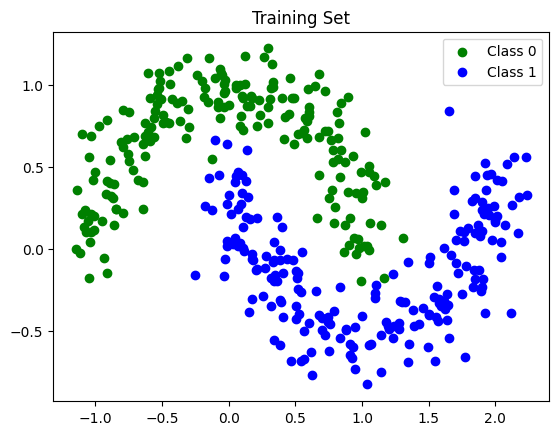

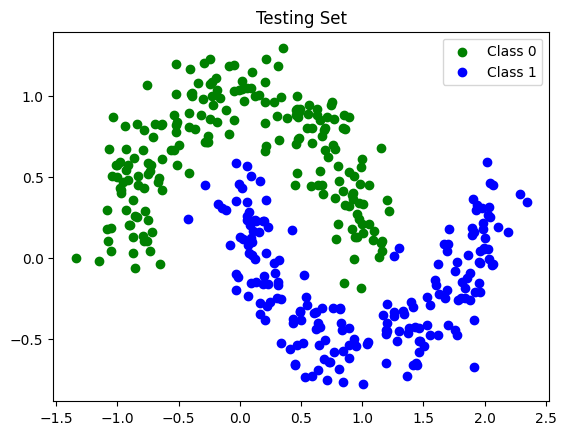

In [9]:
plt.figure()
for (X, y, title) in [(Xtr, ytr, 'Training Set'), (Xtst, ytst, 'Testing Set')]:
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='g', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
    plt.title(title)
    plt.legend()
    plt.show()


**Task 1a**: Consider a binary classifier called perceptron, calculate the generalisation error bounds for the sample sizes given in the template. To train with $m$ samples, use the first $m$ samples of the training set.

*Hint*: The Perceptron algorithm will be covered later in the course. For now, it's sufficient to know that it is a binary classifier. You could use it as follows:

```python
bc = binary_classifier()
# train the classifier on training data
bc.fit(Xtr, ytr)
# obtain predictions on test data
preds = bc.predict(Xtst)
```


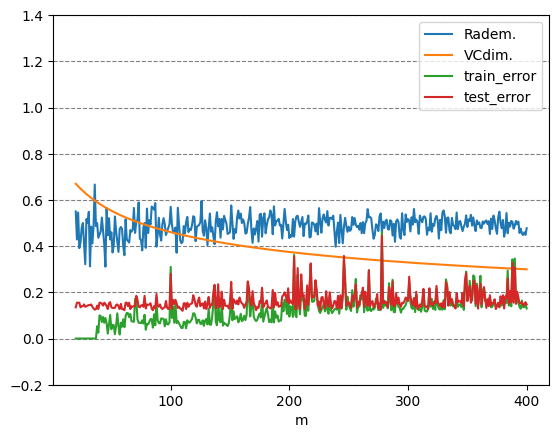

In [7]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate (placeholder)
    # Simulate random label assignment (flipping)
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound (for a perceptron, typically d+1)
    vc_bound = (m ** -0.5) * np.log(m)  # Placeholder formula, typically VC = d + 1
    vcdims.append(vc_bound)

# Plotting the results
plt.figure()
plt.plot(ms, rademachers, label="Radem.")
plt.plot(ms, vcdims, label="VCdim.")
plt.plot(ms, train_errors, label="train_error")
plt.plot(ms, test_errors, label="test_error")
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(100, 400, 4))
plt.xlabel('m')
plt.legend()
plt.show()


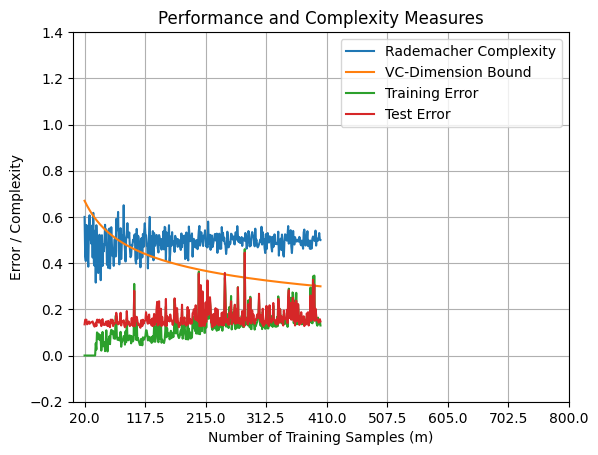

In [10]:
plt.figure()
plt.plot(ms, rademachers, label="Rademacher Complexity")
plt.plot(ms, vcdims, label="VC-Dimension Bound")
plt.plot(ms, train_errors, label="Training Error")
plt.plot(ms, test_errors, label="Test Error")
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Error / Complexity')
plt.title('Performance and Complexity Measures')
plt.grid(True)
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(20, 800, 9))
plt.legend()
plt.show()


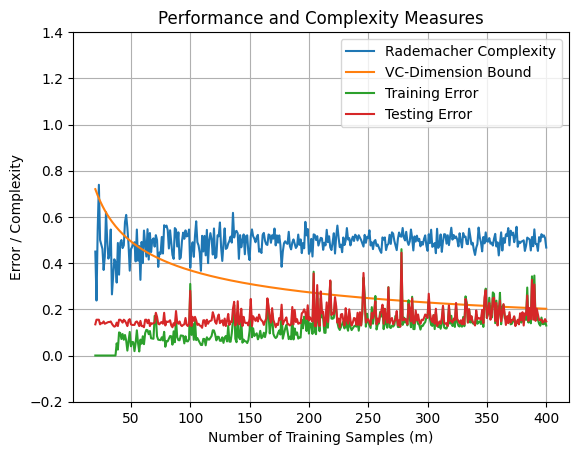

In [13]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss
from sklearn.utils import shuffle

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound
    d = Xtr.shape[1]  # Dimensionality
    vc_bound = np.sqrt((d * np.log(2 * m / d) + np.log(4 / 0.05)) / m)
    vcdims.append(vc_bound)

# Plotting the results
plt.figure()
plt.plot(ms, rademachers, label="Rademacher Complexity")
plt.plot(ms, vcdims, label="VC-Dimension Bound")
plt.plot(ms, train_errors, label="Training Error")
plt.plot(ms, test_errors, label="Testing Error")
plt.grid(True)
plt.ylim(-0.2, 1.4)
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Error / Complexity')
plt.title('Performance and Complexity Measures')
plt.legend()
plt.show()


**Task 1b**: Plot the difference of the generalisation bound based on Rademacher complexity, and the test error. Answer question 4.

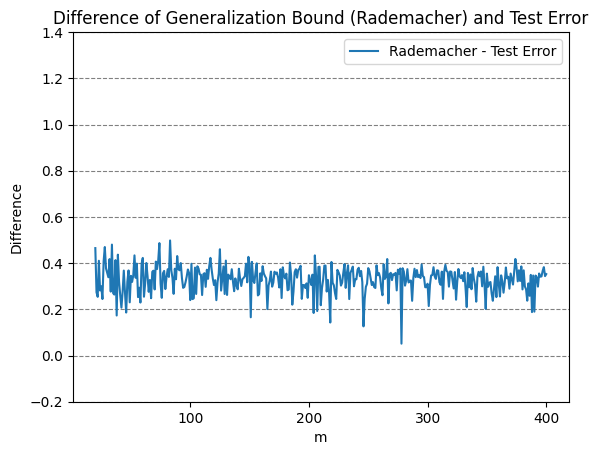

In [8]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []
radem_diffs = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate (placeholder)
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound (placeholder formula)
    vc_bound = (m ** -0.5) * np.log(m)  # Simplified formula for VC-dimension
    vcdims.append(vc_bound)

    # Compute the difference between the Rademacher bound and test error
    radem_diff = rademacher_complexity - test_error
    radem_diffs.append(radem_diff)

# Plotting the difference between Rademacher bound and test error
plt.figure()
plt.plot(ms, radem_diffs, label="Rademacher - Test Error")
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(100, 400, 4))
plt.xlabel('m')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference of Generalization Bound (Rademacher) and Test Error')
plt.show()


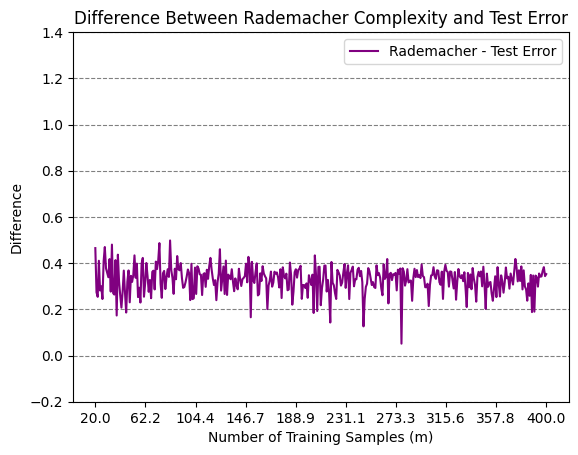

In [11]:
plt.figure()
plt.plot(ms, radem_diffs, label="Rademacher - Test Error", color='purple')
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(20, n, 10))
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Difference')
plt.title('Difference Between Rademacher Complexity and Test Error')
plt.legend()
plt.show()


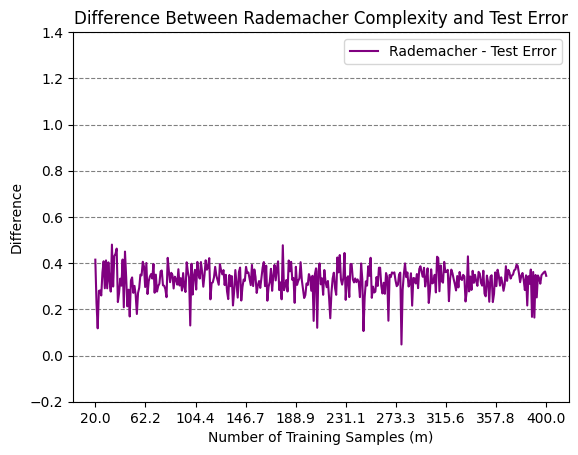

In [14]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []
radem_diffs = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound (simplified for demonstration purposes)
    d = Xtr.shape[1]  # Dimensionality of the data
    vc_bound = np.sqrt((d * np.log(2 * m / d) + np.log(4 / 0.05)) / m)
    vcdims.append(vc_bound)

    # Compute the difference between the Rademacher complexity and test error
    radem_diff = rademacher_complexity - test_error
    radem_diffs.append(radem_diff)

# Plotting the difference between Rademacher complexity and test error
plt.figure()
plt.plot(ms, radem_diffs, label="Rademacher - Test Error", color='purple')
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(20, n, 10))
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Difference')
plt.title('Difference Between Rademacher Complexity and Test Error')
plt.legend()
plt.show()


**Task 1c**: Plot the difference of the generalisation bound based on VC-dimension, and the test error. Answer question 5.

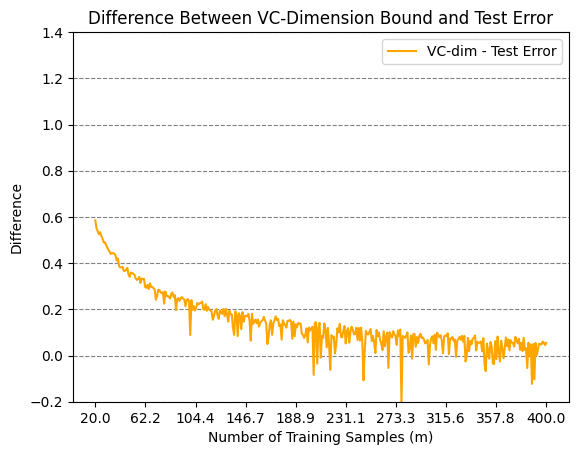

In [12]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Number of features (d) in your dataset
d = Xtr.shape[1]
delta = 0.05  # Confidence level

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []
vc_diffs = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate (placeholder)
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound
    vc_bound = np.sqrt((d * np.log(2 * m) + np.log(1 / delta)) / m)
    vcdims.append(vc_bound)

    # Compute the difference between the VC-dimension bound and test error
    vc_diff = vc_bound - test_error
    vc_diffs.append(vc_diff)

# Plotting the difference between VC-dimension bound and test error
plt.figure()
plt.plot(ms, vc_diffs, label="VC-dim - Test Error", color='orange')
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(20, n, 10))
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Difference')
plt.title('Difference Between VC-Dimension Bound and Test Error')
plt.legend()
plt.show()


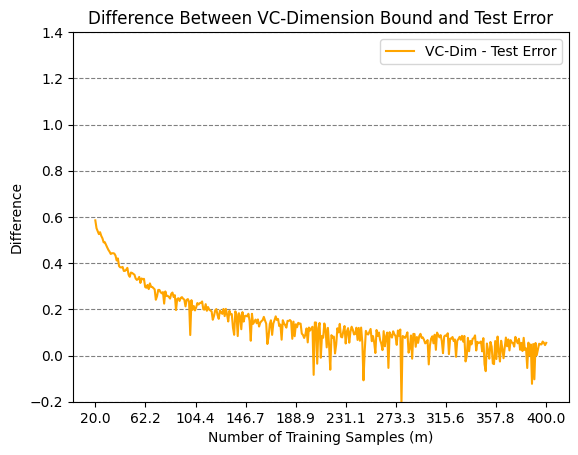

In [15]:
from sklearn.linear_model import Perceptron as binary_classifier
from sklearn.metrics import zero_one_loss
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes to evaluate
ms = np.array(range(20, n + 1))

# Number of features (d) in your dataset
d = Xtr.shape[1]
delta = 0.05  # Confidence level

# Arrays to store results
train_errors = []
test_errors = []
rademachers = []
vcdims = []
vc_diffs = []

# Train classifier and compute errors for each sample size m
for m in ms:
    clf = binary_classifier()

    # Train on the first m samples
    clf.fit(Xtr[:m], ytr[:m])

    # Compute train and test errors
    train_error = zero_one_loss(ytr[:m], clf.predict(Xtr[:m]))
    test_error = zero_one_loss(ytst, clf.predict(Xtst))

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Compute Rademacher complexity estimate
    random_labels = np.random.choice([0, 1], size=m)
    clf.fit(Xtr[:m], random_labels)
    rademacher_complexity = zero_one_loss(random_labels, clf.predict(Xtr[:m]))
    rademachers.append(rademacher_complexity)

    # Compute VC-dimension bound
    vc_bound = np.sqrt((d * np.log(2 * m) + np.log(1 / delta)) / m)
    vcdims.append(vc_bound)

    # Compute the difference between the VC-dimension bound and test error
    vc_diff = vc_bound - test_error
    vc_diffs.append(vc_diff)

# Plotting the difference between VC-dimension bound and test error
plt.figure()
plt.plot(ms, vc_diffs, label="VC-Dim - Test Error", color='orange')
plt.grid(axis='y', color='grey', linestyle='dashed')
plt.ylim(-0.2, 1.4)
plt.xticks(np.linspace(20, n, 10))
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Difference')
plt.title('Difference Between VC-Dimension Bound and Test Error')
plt.legend()
plt.show()
